## Overview

1. Importing relevant libraries
2. Introducing and exploring data
3. Data Cleaning (if required)
   - A. Handling Data Types
   - B. Handling Missing Data
4. Handling Imbalanced data (if required)
5. Feature Engineering
6. Decision Tree Modeling
7. Logistics Regression Modeling
8. Neural Network Modeling
10. Performance Enhancement


## 1. Imporing the required libraries and packages. 

In [2]:
#Import the libraries needed in the following procedure....

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.utils import resample

df = pd.read_csv('creditcard.csv') 

## 2. Introducing and exploring the data

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## 3. Data Cleaning
A. Handling Data Types
B. Handling Missing Data. Need not to deal with missing data, since there ain't any null values.

In [6]:
# Looking at the target feature value distribution

class_dist = df['Class'].value_counts()
class_dist


0    284315
1       492
Name: Class, dtype: int64

###### Highly imbalanced data.

## 4. Handling Imbalanced Data

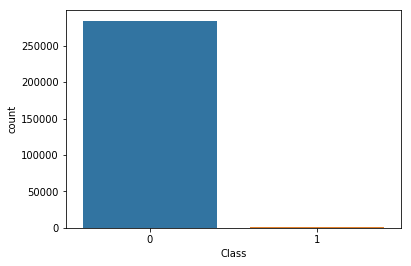

In [7]:
#Visualizing feature'Class' distribution

sns.countplot("Class",data=df)

In [8]:
#lets see the percentage distribution of feature 'Class' !
#1 means fraud, 0 means normal transaction(Non Fraud)!

fraudulent = len (df[df ['Class']==1])
non_fraudulent = len (df[df ['Class']==0])

perc_fraudulent = fraudulent / (fraudulent + non_fraudulent)
perc_non_fraudulent = non_fraudulent /(fraudulent + non_fraudulent)

print ("Percentage of fraudulent transactions is", round(perc_fraudulent,3) * 100,'%')
print ("Percentage of non_fraudulent transactions is", round(perc_non_fraudulent,3) * 100,'%')

Percentage of fraudulent transactions is 0.2 %
Percentage of non_fraudulent transactions is 99.8 %


In [9]:
print (".....Fraudulent.....")
print (df.Amount[df.Class == 1].describe())
print ()
print ()
print ("....Non Fraudulent....")
print (df.Amount[df.Class == 0].describe())

.....Fraudulent.....
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


....Non Fraudulent....
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


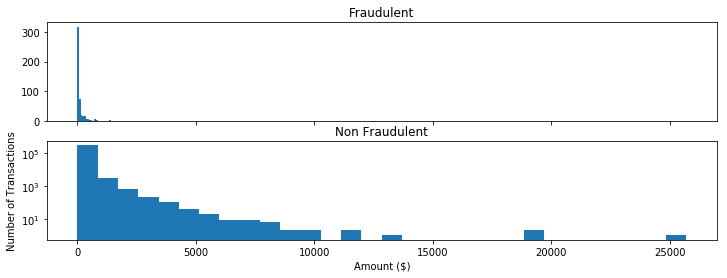

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraudulent')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Non Fraudulent')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Maximum fraudulent amount is $2125.870000, whereas for non fraudulent classs it is $25691.160000. Furthermore, almost all the fraud transactions are less than $100. This is another difference between the two Class types.

In [11]:
# lets see how time differs across the two categories !

print ("......Fraudulent......")
print (df.Time[df.Class == 1].describe())
print ()
print ()
print ("....Non Fraudulent....")
print (df.Time[df.Class == 0].describe())

......Fraudulent......
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


....Non Fraudulent....
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


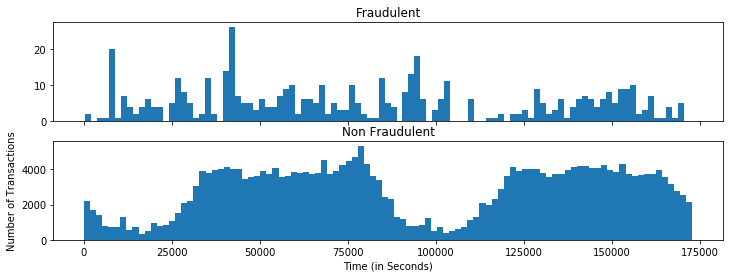

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 100

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraudulent')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Non Fraudulent')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

Time is almost similarly distributed across both the classes, but class 1 shows a uniform distribution, while class 0 is roughly cyclic. 
This can serve as a differentiator for our study.

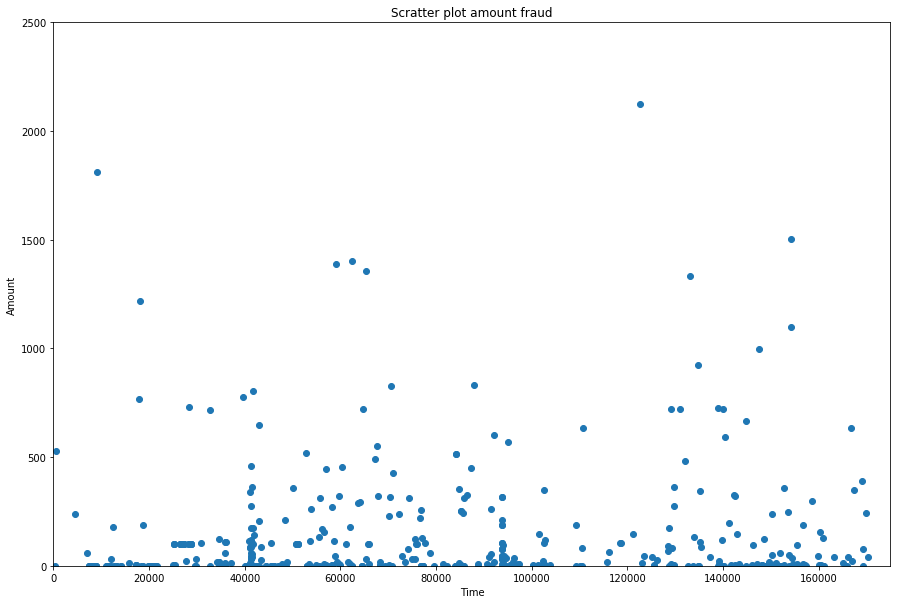

In [13]:
#Fraudalent Transactions Amount and Time Scatter Plot
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

We notive, first of all, the time doesnt impact the frequency of frauds. Moreover, the majority of frauds are small amounts.

In [14]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [15]:
#By default, 0 means not favorable, and 1 means favorable outcome
'''For the given dataset, the classes are already distinguished as 0 and 1,
so we don't need to convert the traget variable into binary classes'''

X = df.drop('Class', 1)
Y = df.Class

In [16]:
X.head(5)  #dependent Features/variables

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [17]:
Y.head(5) #target variable

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## 5. Feature Engineering 

We can help the machine to create some variables to predict the outcome. Feature engineering is to make additional variables as input features.
Below are basic steps:
1. Drop features which are having similar distributions for the two classes.
2. Treat extremely small categories: usually we can merge them, or re-code them.. We dont have to worry about it in this problem as there are no categorical variables
3. Treat missing data: this can be a big issue for some problems. We can randomly assign a value, impute, assign an average, or create a dummy variable for those missing records. In this problem, we dont have to worry as there are no missing values.

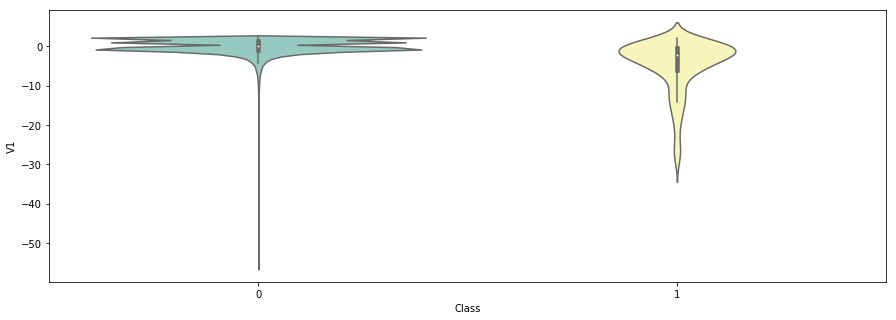

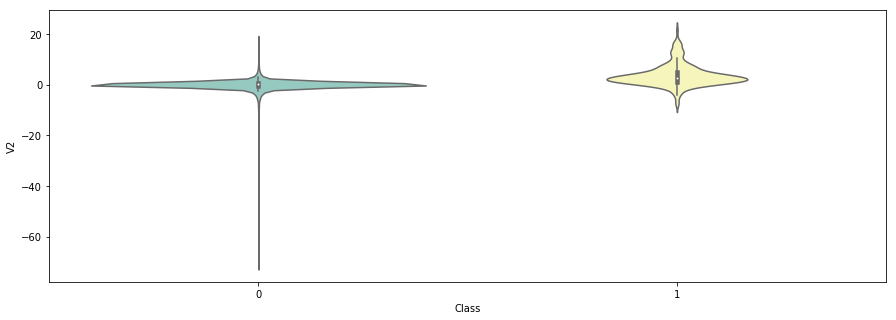

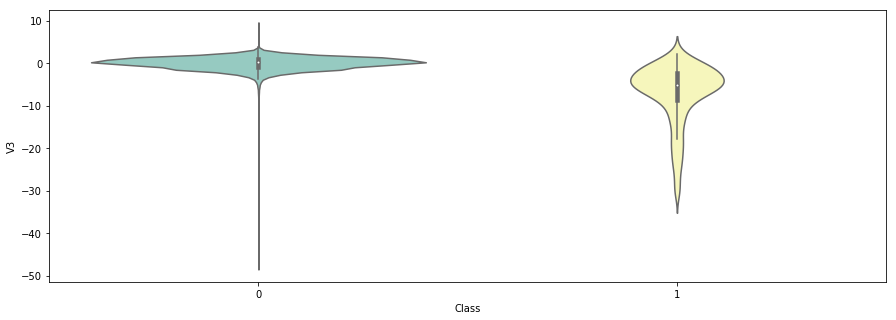

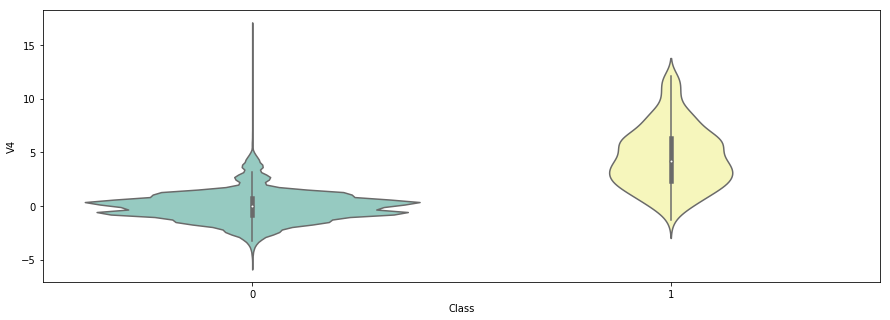

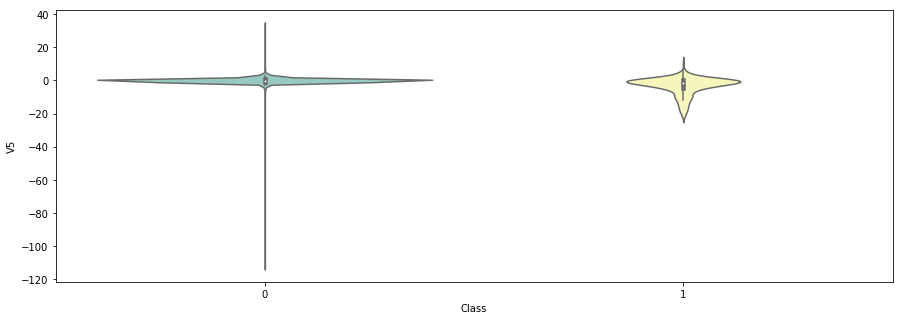

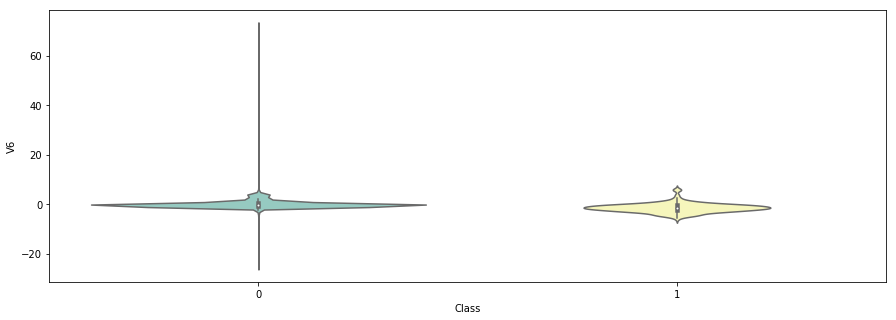

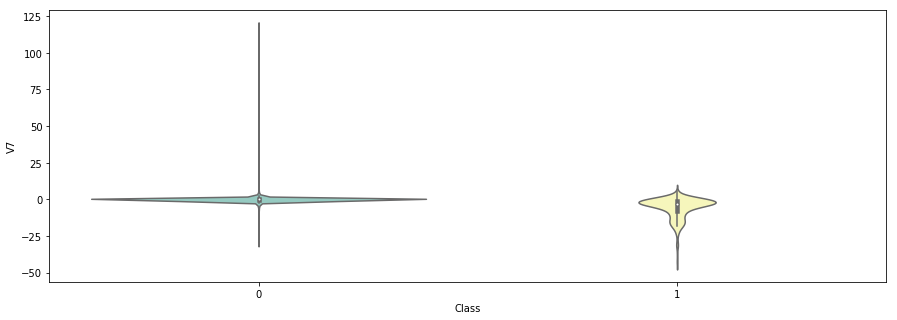

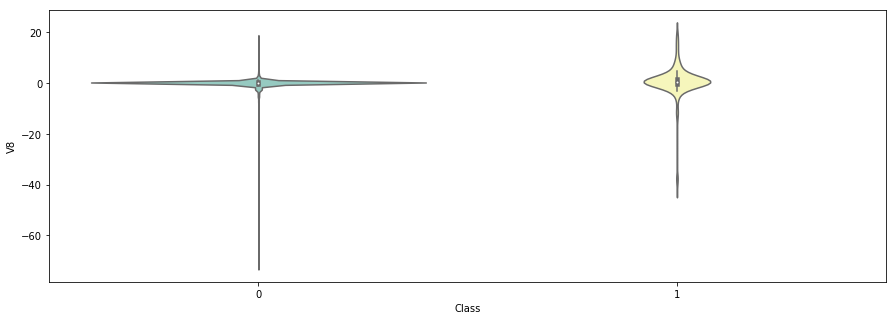

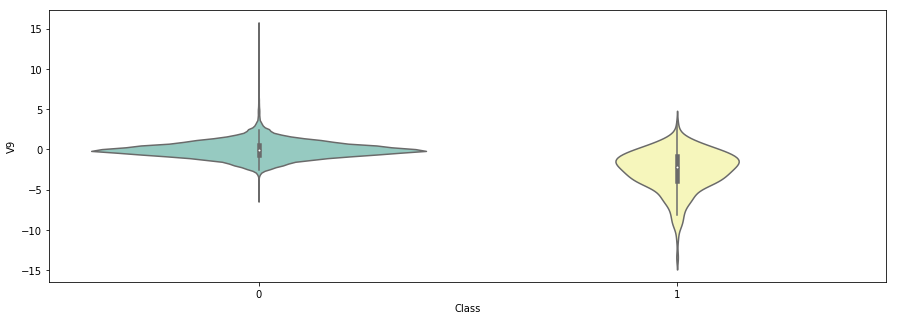

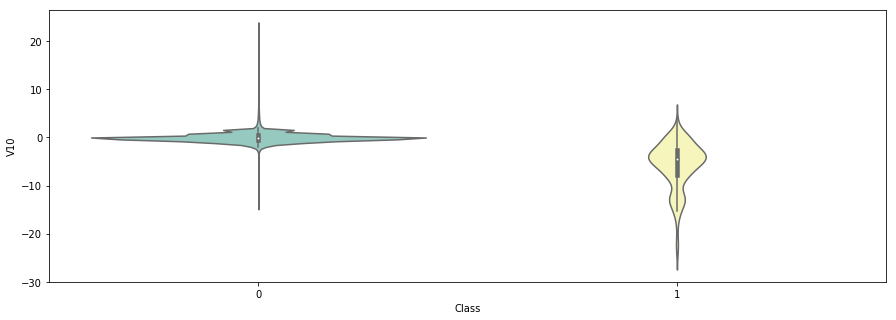

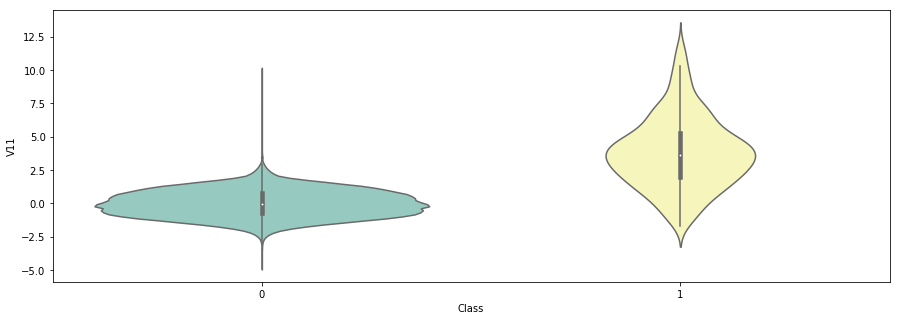

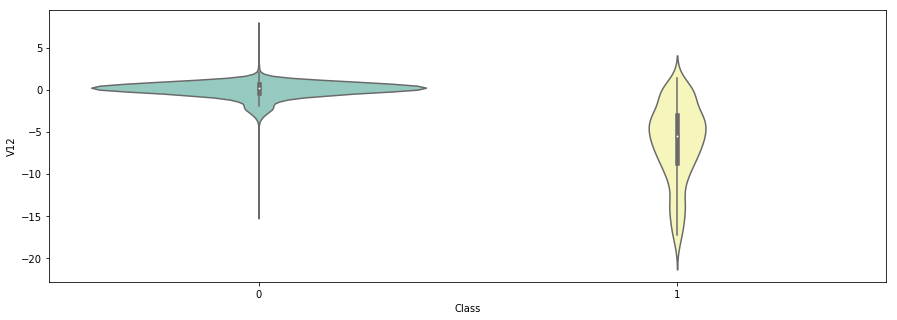

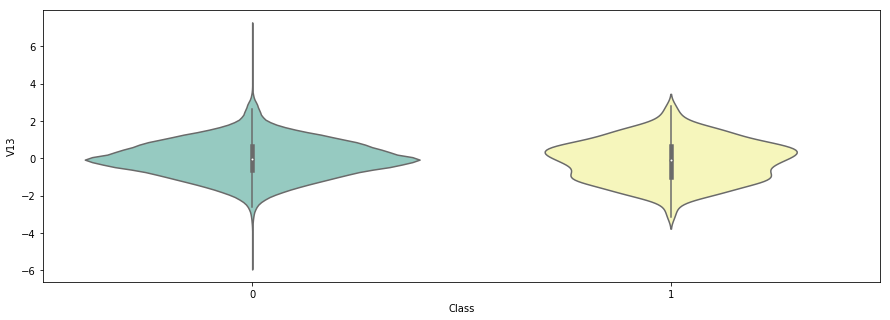

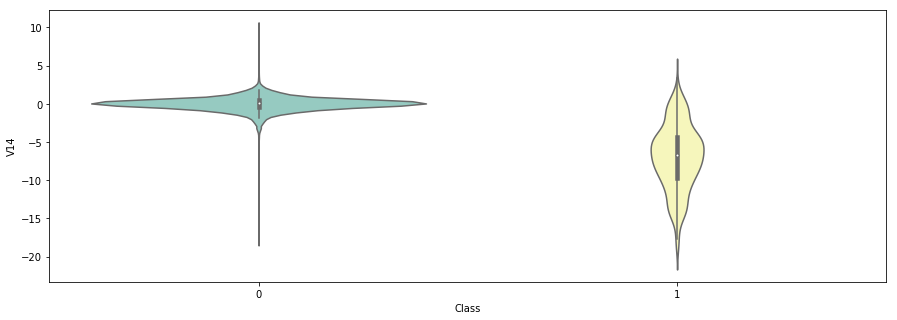

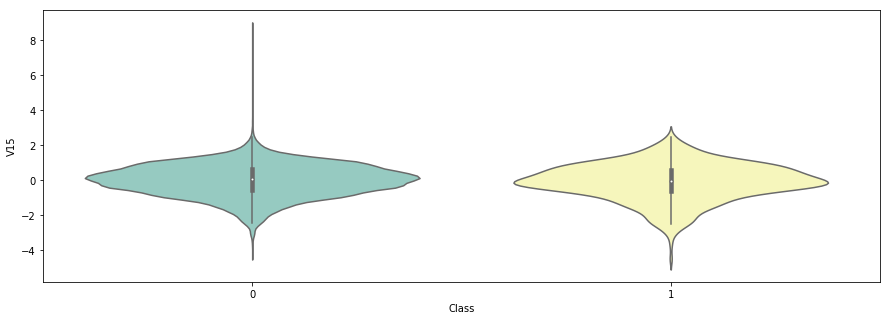

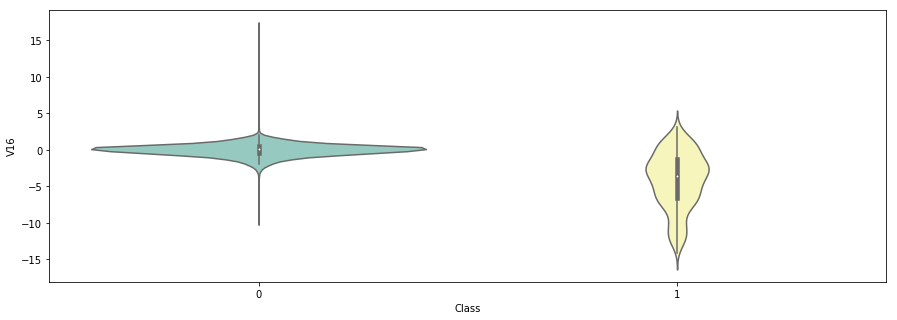

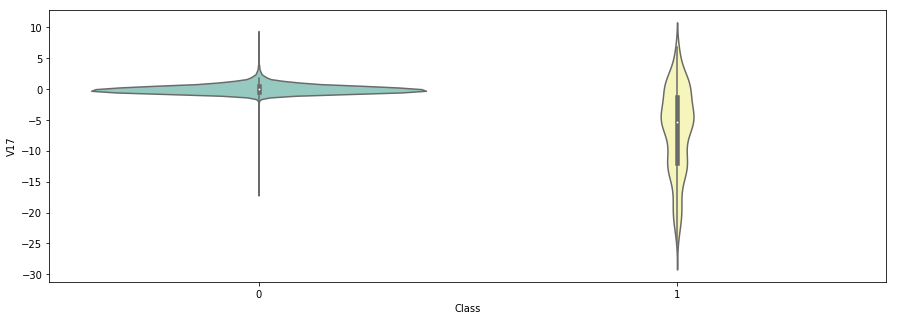

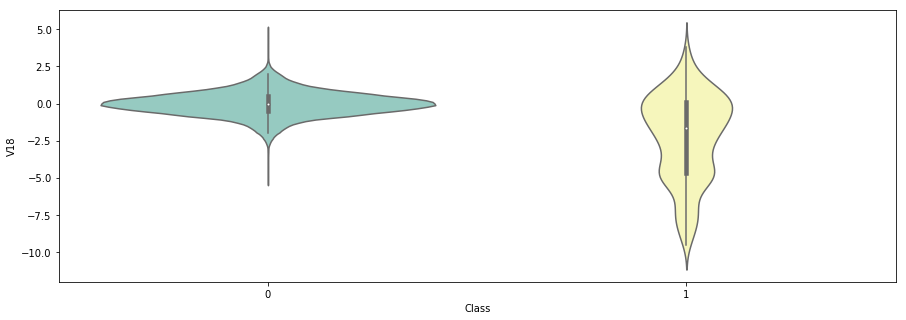

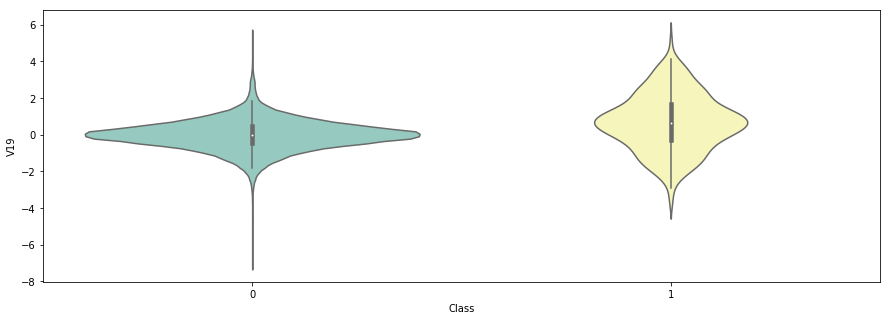

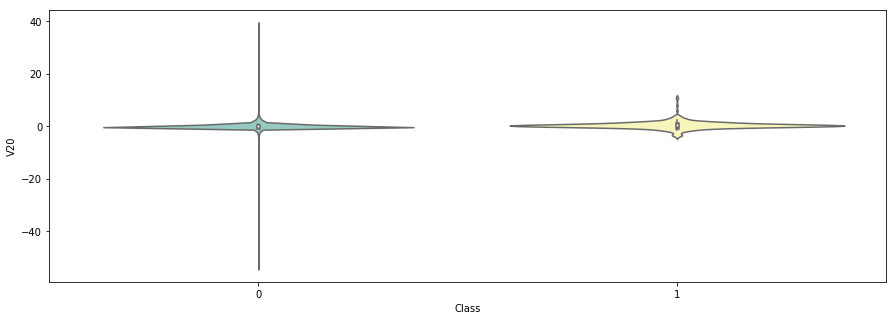

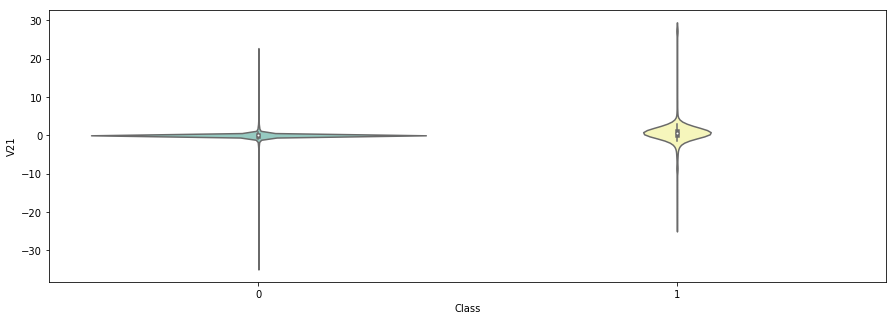

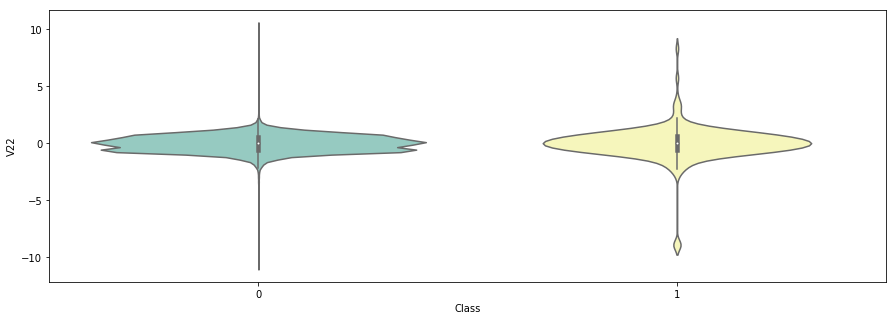

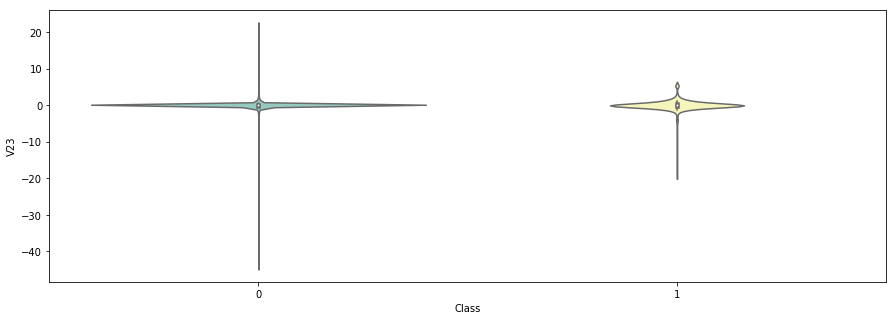

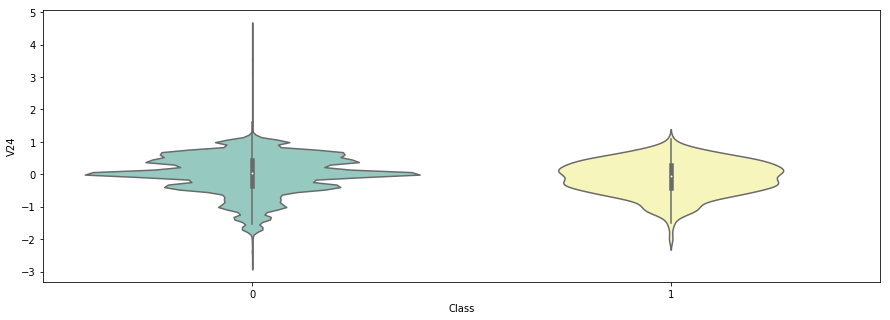

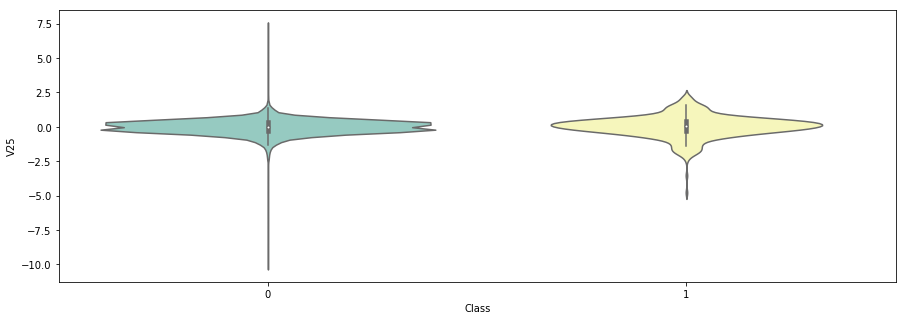

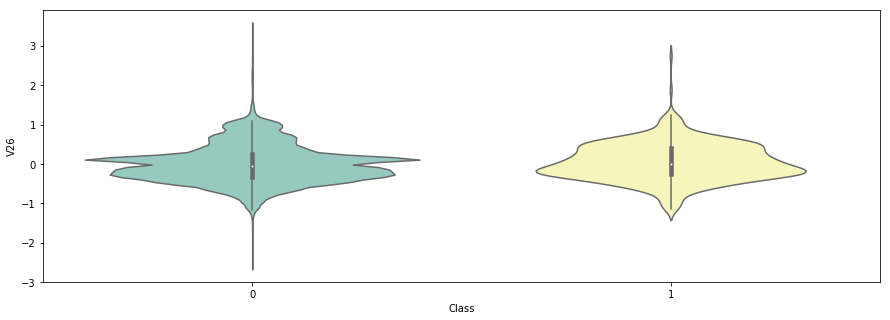

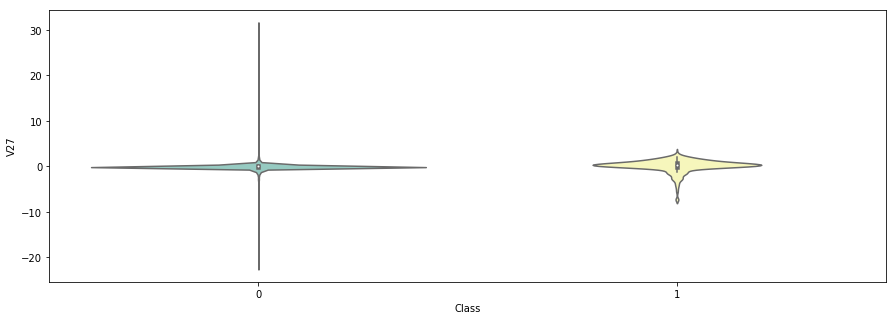

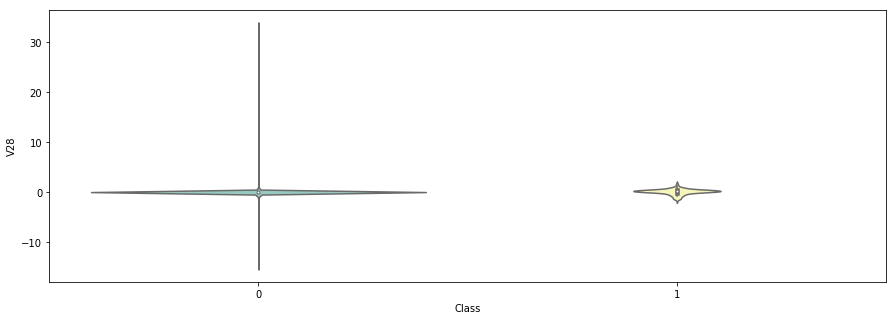

In [18]:
#Lets see violinplot of attributes V1 to V28 with Class
cols=df.iloc[:,1:29]
for i in cols.columns:
    f, ax = plt.subplots(figsize=(15, 5))
    sns.violinplot(x="Class", y=i, data=df, scale="area",palette="Set3")
    plt.show()

Drop all of the features that have very similar distributions between the two types of transactions:

As we can see the variables like V8,V13,V15,V20,V22,V23,V24,V25,V26,V27,V28 
have similar distributions between two classes 0 and 1, we can drop all these 
features as they are not useful for the further analysis.

In [19]:
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

Heat map of correlation of features

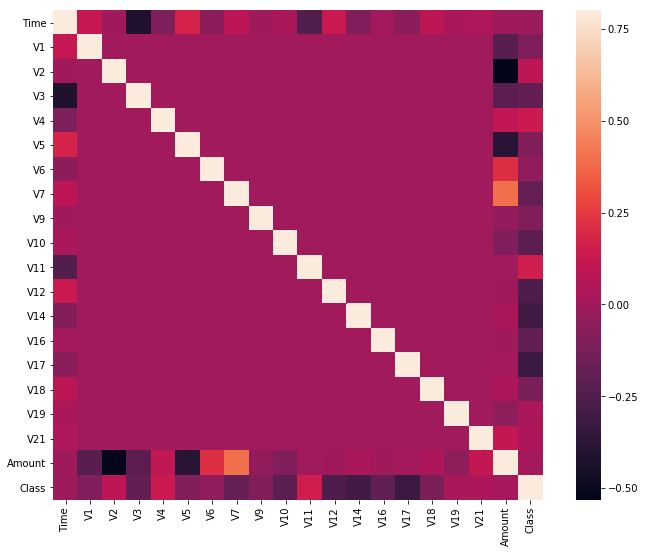

In [20]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

As we can notice, most of the features are not correlated with each other. This corroborates the fact that a PCA was previously performed on the data. As the PCA was computed correctly we need not do dimension reduction.

In [21]:
# Standardizing the features
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,0,-0.073403,-1.996541


Now all the features are standardized into unit sclae (mean = 0 and variance = 1)

Since the data is highly imbalanced, we are taking 492 rows from the non_fraud transactions.

In [22]:
# Separate majority and minority classes
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=284315,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Class.value_counts()


1    284315
0    284315
Name: Class, dtype: int64

Text(0,0.5,'Frequency')

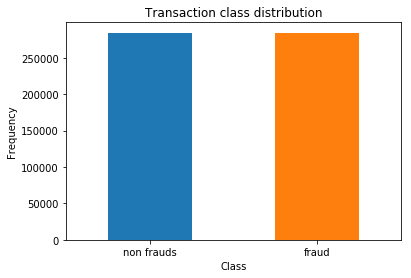

In [23]:
# Let's plot the Transaction class against the Frequency
labels = ['non frauds','fraud']
classes = pd.value_counts(df_upsampled['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [24]:
# prepare the data
features = df_upsampled.drop(['Class'], axis = 1)
labels = pd.DataFrame(df_upsampled['Class'])

feature_array = features.values
label_array = labels.values

Data Splitting

In [25]:
# splitting the feature array and label array keeping 80% for the training sets
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)



## 6. Decision Tree


In [26]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state=10)

In [27]:
class_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [28]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(class_tree, X_train, y_train, cv=10, scoring='accuracy')
scores1.mean()

0.9994834077780143

In [29]:
#Predict the response for test dataset
y_prediction_tree = class_tree.predict(X_test)

In [30]:
#Classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_prediction_tree))

0.9996570705027874


In [31]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion matrix
cm1=confusion_matrix(y_test, y_prediction_tree)
print(cm1)

# New line
print('\n')

# Classification report
print(classification_report(y_test,y_prediction_tree))

[[56807    39]
 [    0 56880]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56846
           1       1.00      1.00      1.00     56880

   micro avg       1.00      1.00      1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



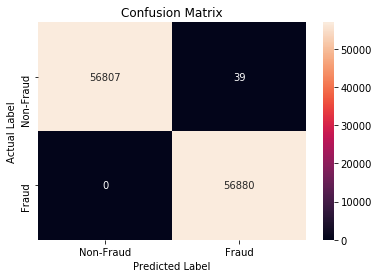

In [32]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
import matplotlib.pyplot as plt
class_label = ["Non-Fraud", "Fraud"]
df_tree = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_tree, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

__Accuracy:__ It is calculated by correctly classified points divided by total no of points.Theese Model gives accuarcy of 99.9% after using 10 fold cross validation with cross validation score 99%

__Senestivity or Recall__:It gives the  recall of  100% by predicting 56880 people as "fraud" out of all the people. While 99.9% by predicting 56807 people as non fraud  out of 56846 people. 



## 7. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [35]:
lrn = LogisticRegression()
lrn.fit(X_train,y_train)

C:\Users\karth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\karth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lrn, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

C:\Users\karth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\karth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\karth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\karth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\karth\Anaconda3\lib\site-packages\sklearn\linear_

0.9434342161377417

In [37]:
#Predict the response for test dataset
y_prediction_lrn = lrn.predict(X_test)

In [38]:
#Classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_prediction_lrn))

0.9429242213741801


In [39]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion matrix
cmlr=confusion_matrix(y_test, y_prediction_lrn)
print(cmlr)

# New line
print('\n')

# Classification report
print(classification_report(y_test,y_prediction_lrn))

[[55538  1308]
 [ 5183 51697]]


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     56846
           1       0.98      0.91      0.94     56880

   micro avg       0.94      0.94      0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726



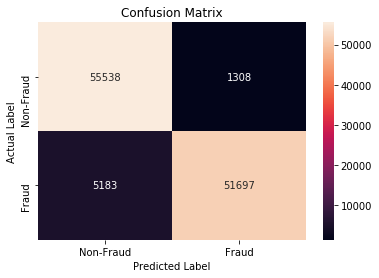

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
class_label = ["Non-Fraud", "Fraud"]
df_lrn = pd.DataFrame(cmlr, index = class_label, columns = class_label)
sns.heatmap(df_lrn, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

__Accuracy:__ It is calculated by correctly classified points divided by total no of points.Theese Model gives accuarcy of 94.2% after using 10 fold cross validation with cross validation score 94.3%

__Senestivity or Recall__:It gives the  recall of  91% by predicting 51697 people as "fraud" out of all the 56880  people. While 98% by predicting 55538 people as non fraud  out of 56846 people. 

## 8. Neural Networks

In [41]:
#Import Neural Network library
from sklearn.neural_network import MLPClassifier

#Create a Neural Network Classifier
nn = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500,random_state=10) # Linear Kernel

In [42]:
#Train the model using the training sets
nn.fit(X_train,y_train)

C:\Users\karth\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=10, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [43]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nn, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

C:\Users\karth\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\karth\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\karth\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\karth\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was pass

0.9986876429345761

In [44]:
#Predict the response for test dataset
y_prediction_nn = nn.predict(X_test)

In [45]:
#Classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_prediction_nn))

0.9996570705027874


In [46]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion matrix
cmnn=confusion_matrix(y_test, y_prediction_nn)
print(cmnn)

# New line
print('\n')

# Classification report
print(classification_report(y_test,y_prediction_nn))

[[56807    39]
 [    0 56880]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56846
           1       1.00      1.00      1.00     56880

   micro avg       1.00      1.00      1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



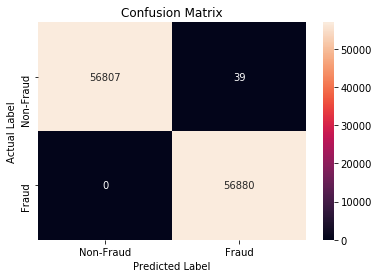

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
class_label = ["Non-Fraud", "Fraud"]
df_nn = pd.DataFrame(cmnn, index = class_label, columns = class_label)
sns.heatmap(df_nn, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

__Accuracy:__ It is calculated by correctly classified points divided by total no of points.Theese Model gives accuarcy of 99.9% after using 10 fold cross validation with cross validation score 99.8%

__Senestivity or Recall__:It gives the  recall of  100% by predicting 56880 people as "fraud" out of all the 56880  people. While 99.9% by predicting 56807 people as non fraud  out of 56846 people.

##  9. All Models Performance Enhancement Justification
Comparing All the Models and refinement in Terms of Key Performance Metrics

In [50]:
from IPython.display import HTML, display
import tabulate
table = [["Algorithm Name","Accuracy","Senestivity","Precision","CV score"],
    ["Decsion Tree",99.9,100,100,99],
         ["Logistic Regression",94.2,98,91,94.3],
        ["MLP Neural Netrworks",99.9,100,100,99.8]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Algorithm Name,Accuracy,Senestivity,Precision,CV score
Decsion Tree,99.9,100,100,99
Logistic Regression,94.2,98,91,94.3
MLP Neural Netrworks,99.9,100,100,99.8


__Accuracy:__ It is calculated by correctly classified points divided by total no of points.The Model which gives highest accuarcy 90% after 10 fold cross validation are Decision Trees and Neural Networks  and Least accuracy with Logistic Regression model with 94.2%.

__Senestivity or Recall__: Both Decision Trees and Neural Networks  gives the highest recall of 100% by predicting all people  are fraud ,it is recommended to use these two models for its optimized performance

__Precision__:  In our business problem we wont consider precision much and it tells us that higher precision means predicted positves but actually they are negative, we will concentrate more on recall

__CV Score__: It will judge the quality of the fit (or the prediction) on new data. Bigger is better. In our case all models predict good for the future unseen points and average highest values accounts neural networks

As we can see that Neural Network and Decision Tree is powerful which can completely detect the transaction whether it is fraud or not.

However, due to computational complexity and Space , we limited our project by  making the unbalanced dataset to balanced dataset

Even though, we have full accuracy , we  can use different approach like using the metrics AUC(Revere Operating Characteristics curve) as we know that Confusion Matrix Accuracy  is not meaningful for unbalanced datasets 
